# Text or Image: Whose embeddings carry more weight?

In [9]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the CLIP model and processor from Hugging Face
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

In [10]:
image_paths = ["/content/GrannySmith.png", "/content/Pizza.png", "/content/Toaster.png",
               "/content/Toaster_real.jpeg", "/content/pizza_Real.jpeg"]

images = [Image.open(image_path) for image_path in image_paths]

# Define potential textual prompts
texts = [
    "GrannySmith Apple",
    "Pizza",
    "Toaster",
    "Pizza",
    "dough",
    "pineapple"
]


In [11]:
inputs = processor(text=texts, images=images, return_tensors="pt", padding=True)

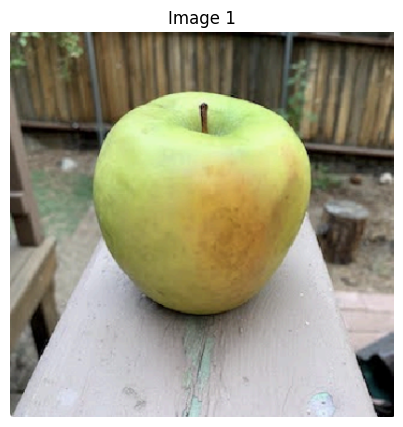

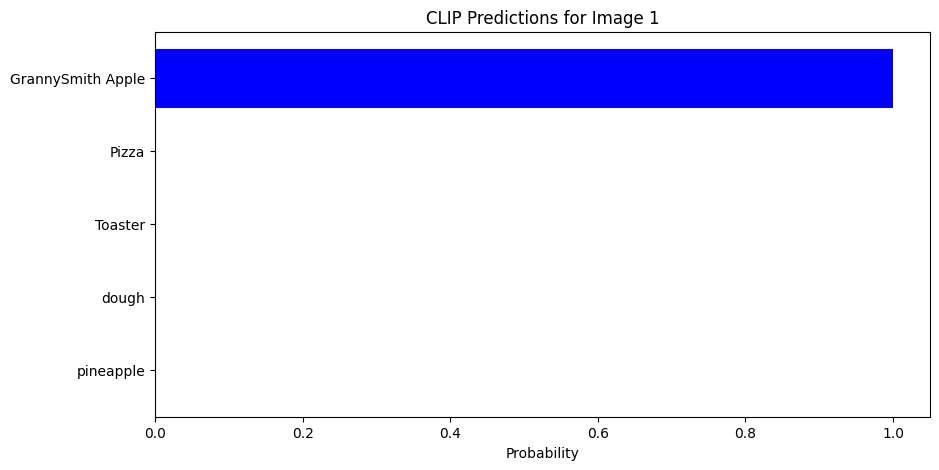

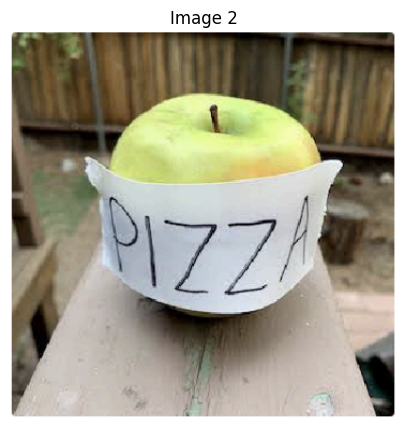

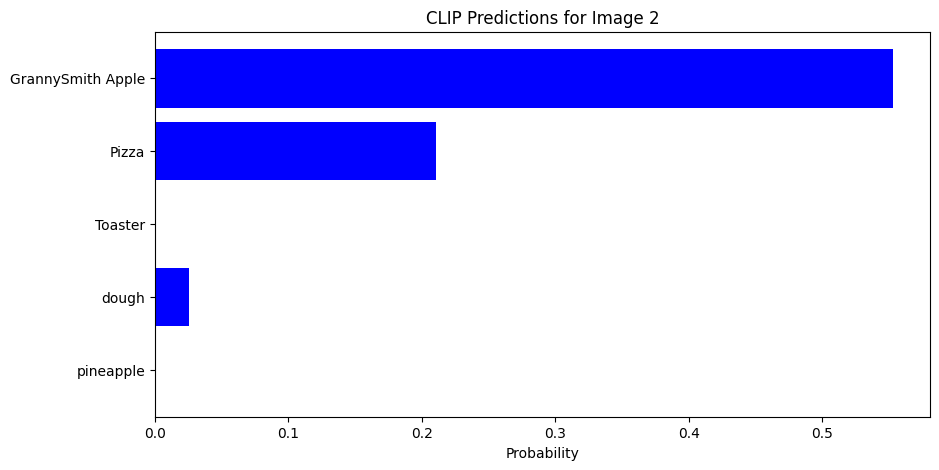

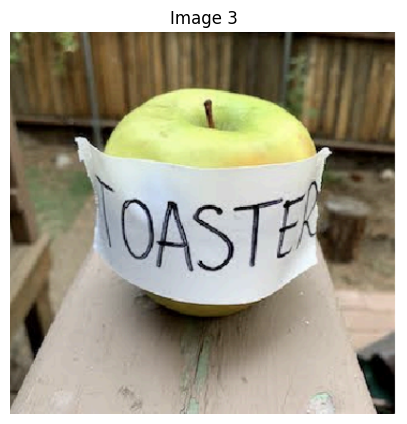

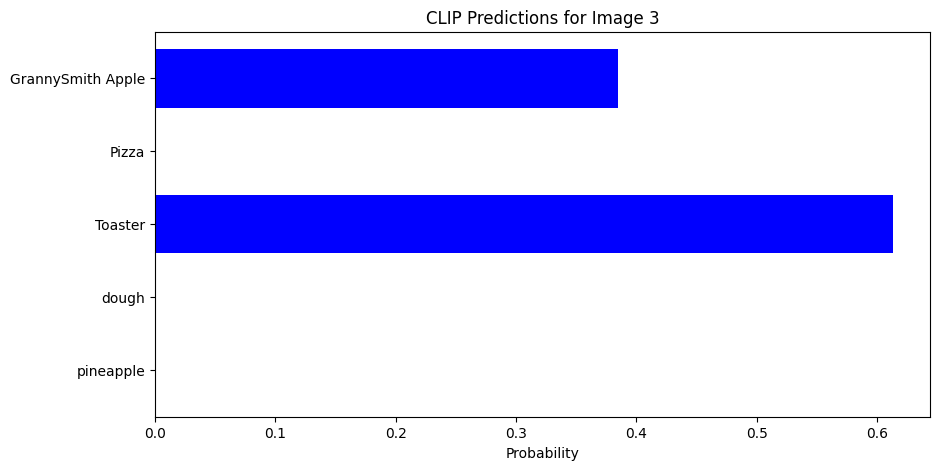

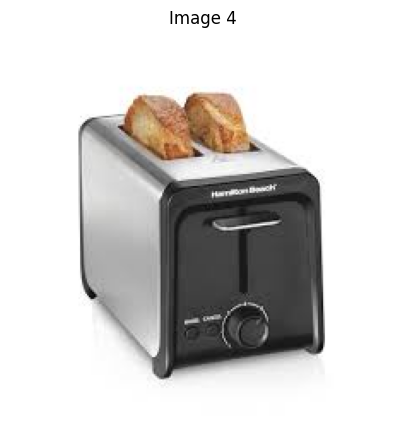

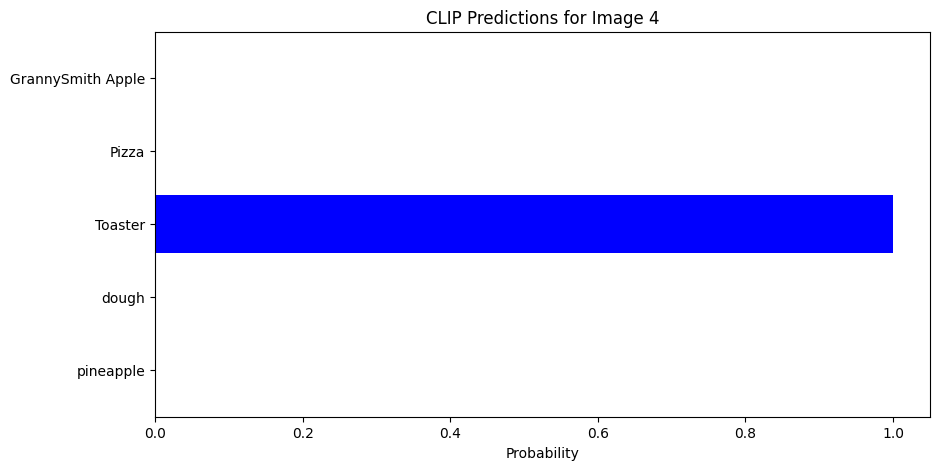

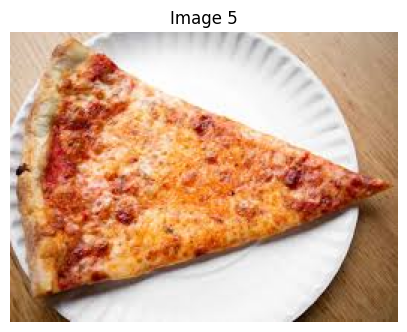

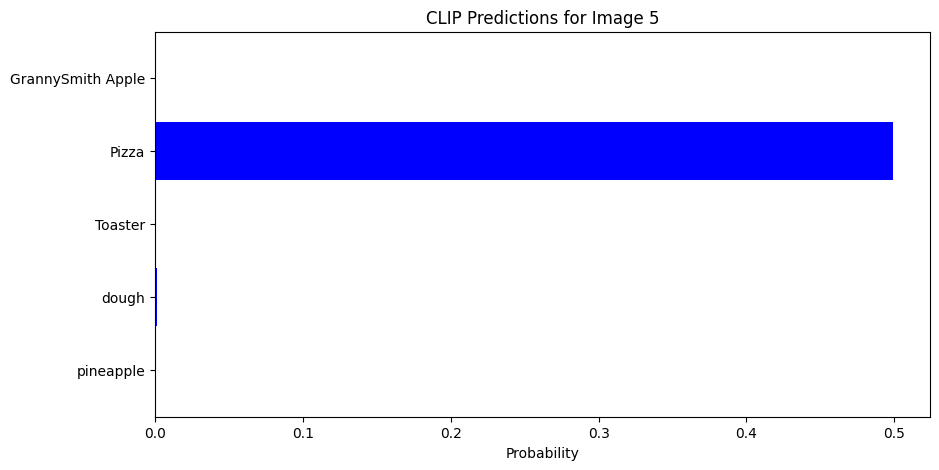

In [12]:
# Inference without gradients for efficiency
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

# Loop through each image and plot its results
for i, image in enumerate(images):
    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Image {i+1}")
    plt.show()

    # Plot the horizontal bar chart of probabilities for each caption
    plt.figure(figsize=(10, 5))
    plt.barh(texts, probs[i].cpu().numpy(), color="blue")
    plt.xlabel("Probability")
    plt.title(f"CLIP Predictions for Image {i+1}")
    plt.gca().invert_yaxis()  # To keep the first caption at the top
    plt.show()